<a href="https://colab.research.google.com/github/zachfreitas/ADS_504_Machine_Learning/blob/main/Module_2/assignment_2/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2.1
Zachariah Freitas



Necessary Libraries

In [314]:
# Import Libraries
%matplotlib inline
import os
import numpy as np
import pandas as pd 

# Turn off warnings to make results look cleaner.
import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns; sns.set()

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
# from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## Question 2

### 2.1

In [8]:
# Get data
s_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_2/assignment_2/shelter_data.csv')

# Resaving as a generic name for reusable code.
df = s_df

s_df.head(5)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [292]:
s_df.describe().T

,count,unique,top,freq
AnimalID,26729,26729,A671945,1
Name,19038,6374,Max,136
DateTime,26729,22918,2015-08-11 00:00:00,19
OutcomeType,26729,5,Adoption,10769
OutcomeSubtype,13117,16,Partner,7816
AnimalType,26729,2,Dog,15595
SexuponOutcome,26728,5,Neutered Male,9779
AgeuponOutcome,26711,44,1 year,3969
Breed,26729,1380,Domestic Shorthair Mix,8810
Color,26729,366,Black/White,2824


In [13]:
s_df.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

In [285]:
# this line drops any rows with missing data
cleaned_data = s_df.dropna()
# here we grab the data we want from pandas
X_data = cleaned_data[['AnimalType','SexuponOutcome','AgeuponOutcome']]
y_data = cleaned_data[['OutcomeType']]
enc = OrdinalEncoder()
enc.fit(X_data)
le = preprocessing.LabelEncoder()
le.fit(y_data)
data_categorical = pd.DataFrame(enc.transform(X_data),
columns=list(X_data))
X=data_categorical
y=le.transform(y_data)

# Without changing the random state, divide your data into 50% for test and 50% for train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [284]:
X_train.head(3).T

,6609,6564,4003
AnimalType,1.0,1.0,0.0
SexuponOutcome,1.0,0.0,2.0
AgeuponOutcome,31.0,21.0,21.0


In [288]:
#Apply the model here
clf =   DecisionTreeClassifier(max_depth=3) #Create your model here
clf = clf.fit(X_train, y_train)   #Fit on training data
y_pred = clf.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

accuracy 0.66 


In [289]:
# Let's see the confusion matrix together
cm = confusion_matrix(le.inverse_transform(y_test), le.inverse_transform(y_pred))
labels=['Adoption', 'Died', 'Euthanasia', 'Transfer']
test_results = pd.DataFrame(cm,index=labels,columns=labels)
display(test_results)

,Adoption,Died,Euthanasia,Transfer
Adoption,65,0,0,786
Died,0,0,0,35
Euthanasia,0,0,1,360
Transfer,3,0,1,2239


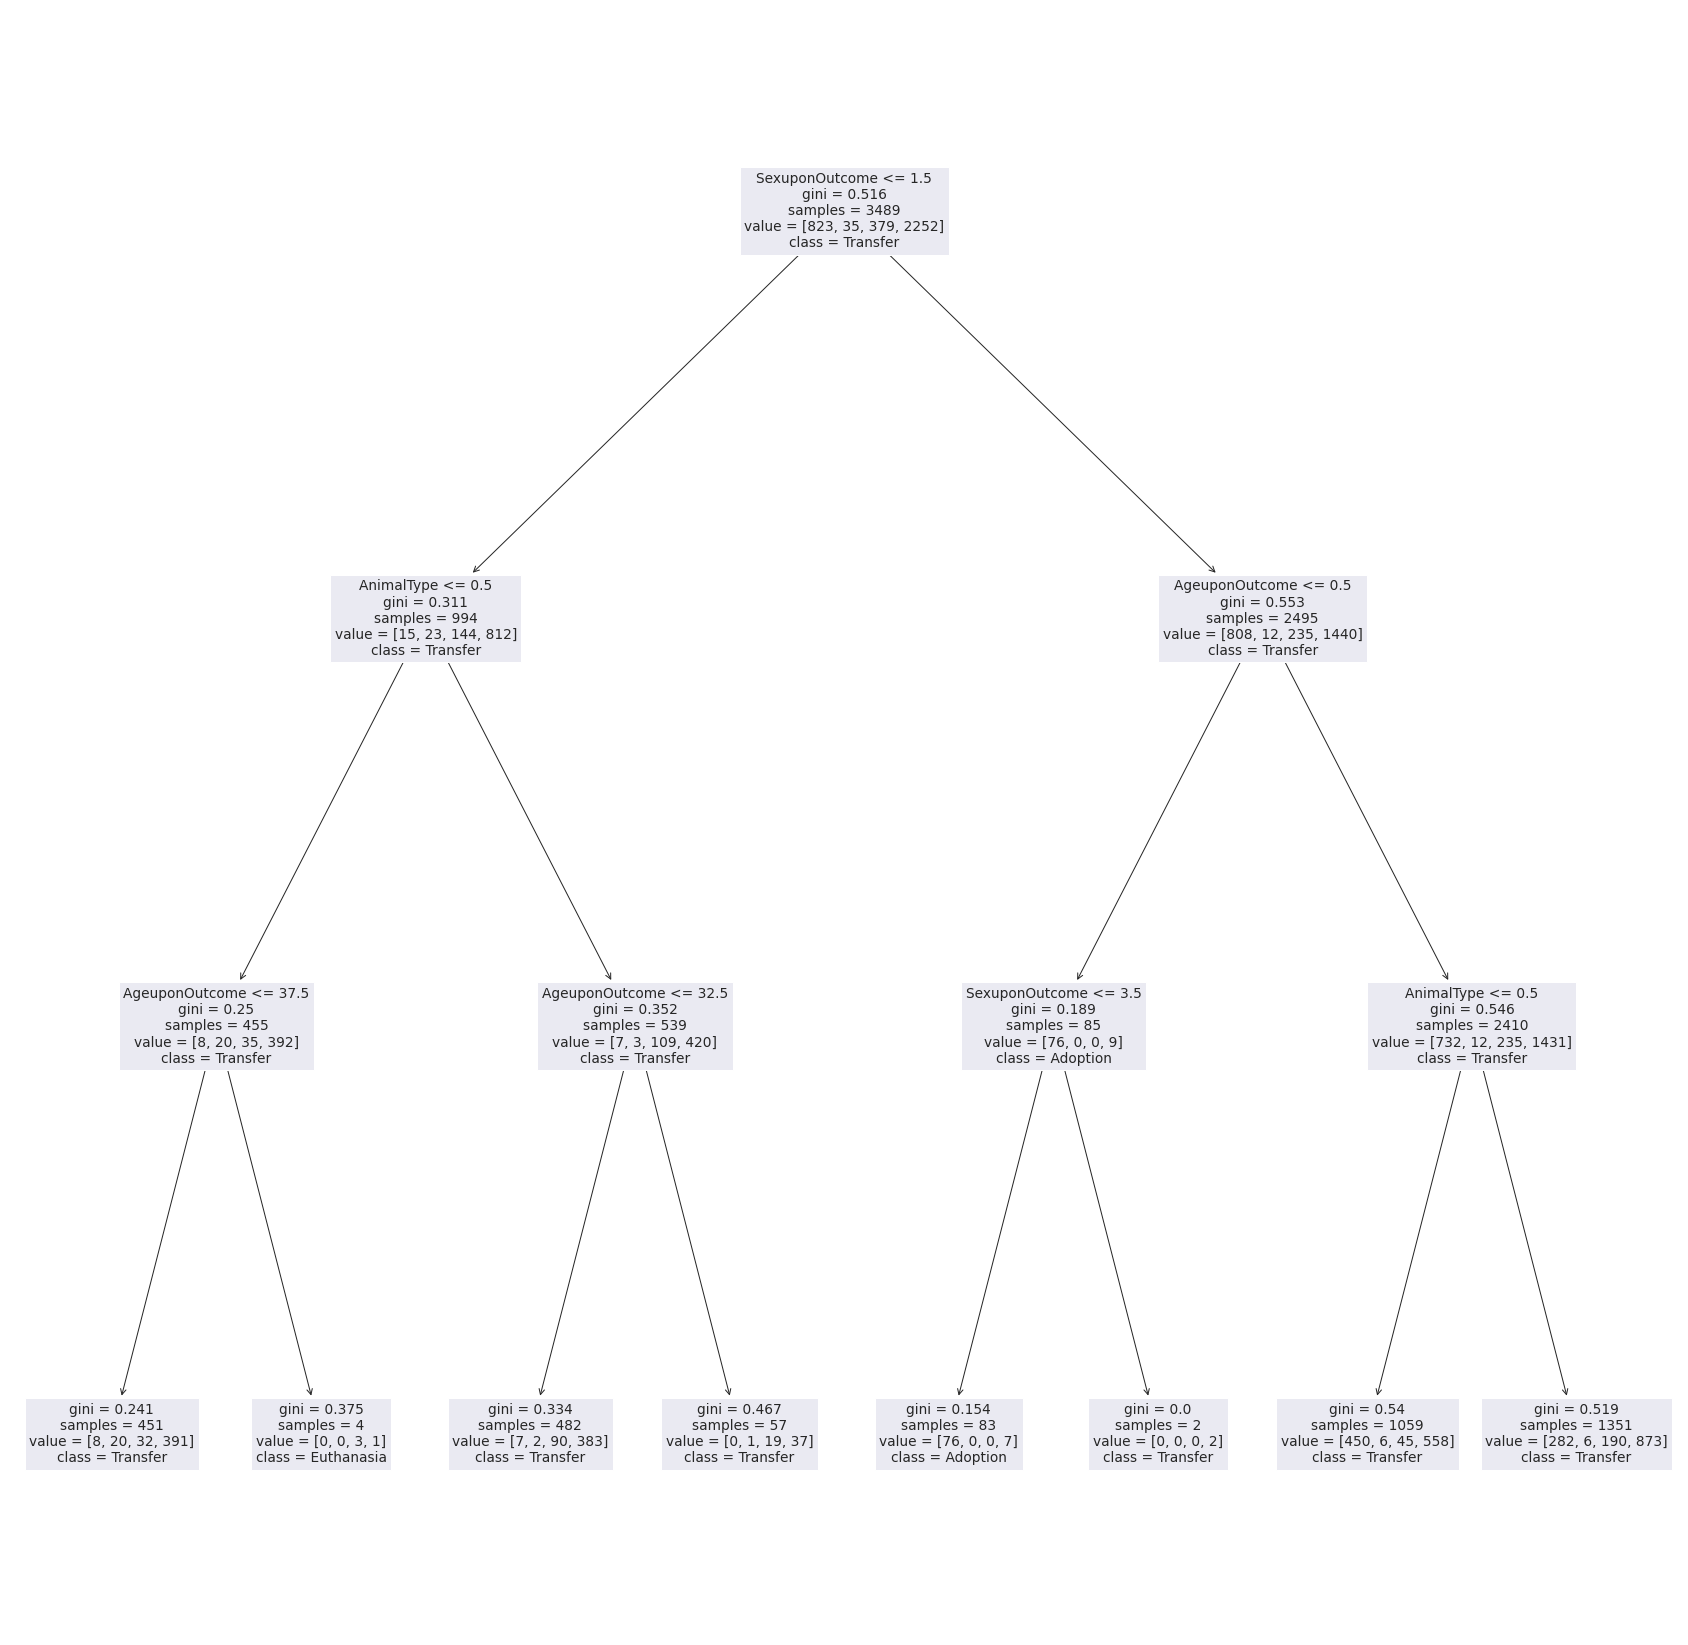

In [291]:
# Plot the decision tree
fig,ax = plt.subplots(figsize = (30,30))
treeplot = tree.plot_tree(clf, 
                          feature_names=['AnimalType','SexuponOutcome','AgeuponOutcome'],
                          class_names = ['Adoption', 'Died', 'Euthanasia', 'Transfer'],ax=ax)

In [26]:
# Get Features and corresponding outcomes
feature_names = ['AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color']

# List down features based on type



training_features = df[feature_names]
outcome_name = ['OutcomeType']
outcome_labels = df[outcome_name]

# Re-engineer Categorical Features

# Create dummy variables from categorical features.
categorical_feature_names = ['AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color']
training_features = pd.get_dummies(training_features, columns = categorical_feature_names)


# # Re-engineer Numerical Features
# numeric_feature_names = [ 'example', 'example']
# from sklearn.preprocessing  import StandardScaler
# ss = StandardScaler()
# # fit scaler on numeric features
# ss.fit(training_features[numeric_feature_names])
# # scale numeric fearures now
# training_features[numeric_feature_names] = ss.transform(training_features[numeric_feature_names])



# View newly engineered features.
training_features.head(5)


,AnimalType_Cat,AnimalType_Dog,SexuponOutcome_Intact Female,SexuponOutcome_Intact Male,SexuponOutcome_Neutered Male,SexuponOutcome_Spayed Female,SexuponOutcome_Unknown,AgeuponOutcome_0 years,AgeuponOutcome_1 day,AgeuponOutcome_1 month,...,Color_White/Yellow,Color_White/Yellow Brindle,Color_Yellow,Color_Yellow Brindle,Color_Yellow Brindle/Blue,Color_Yellow Brindle/Tan,Color_Yellow Brindle/White,Color_Yellow/Black,Color_Yellow/White,Color_Yellow/Yellow
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Create a test train split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(training_features,outcome_labels,test_size=0.2)

In [81]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
y_pred = tree.predict(x_test)

In [131]:
# Classification Performance Metrics
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

       Adoption       0.57      0.97      0.72      2169
           Died       0.00      0.00      0.00        40
     Euthanasia       0.00      0.00      0.00       291
Return_to_owner       0.00      0.00      0.00       966
       Transfer       0.73      0.63      0.67      1880

       accuracy                           0.62      5346
      macro avg       0.26      0.32      0.28      5346
   weighted avg       0.49      0.62      0.53      5346



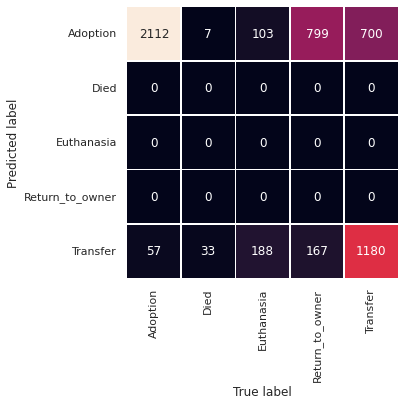

In [108]:
# Visualize the confusion matirx.
def visualize_confusion_matirx(model, y_test, y_pred, ax=None, cmap=None):
  %matplotlib inline
  from sklearn.metrics import confusion_matrix
  import matplotlib.pyplot as plt
  import pandas as pd
  import seaborn as sns; sns.set()
  labels=model.classes_ # Get the unique labels in the model.
  mat = confusion_matrix(y_test, y_pred, labels=labels)
  cm_array_df = pd.DataFrame(mat, index=labels, columns=labels)
  plt.figure(figsize=[5,5])
  sns.heatmap(cm_array_df.T, square=True, annot=True, fmt='d', cbar=False, linewidths=.5, cmap=cmap)
  plt.xlabel('True label')
  plt.ylabel('Predicted label');

visualize_confusion_matirx(tree, y_test,y_pred)

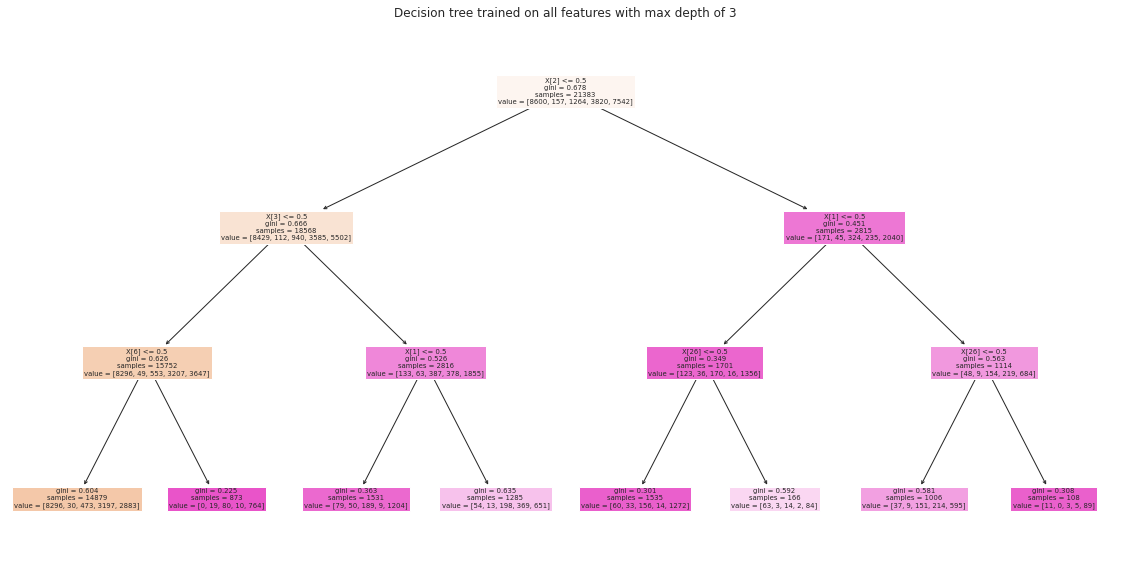

In [101]:
# Visualize the tree.
from sklearn.tree import plot_tree

plt.figure(figsize=[20,10])
plot_tree(tree, filled=True, max_depth=None)
plt.title("Decision tree trained on all features with max depth of 3")
plt.show()

In [127]:
# Vary the decision tree depth in a loop, increasing depth from 3 to 10 and capture error rate for test and training. 

from sklearn.metrics import accuracy_score

max_depths = range(3, 10 + 1)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth)
    model_1.fit(x_train, y_train)
    training_error.append(1-accuracy_score(y_train, model_1.predict(x_train))) # Save Error Rate = 1-Accuracy
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth)
    model_2.fit(x_train, y_train)
    testing_error.append(1-accuracy_score(y_test, model_2.predict(x_test))) # Save Error Rate = 1-Accuracy



Using matplotlib backend: agg


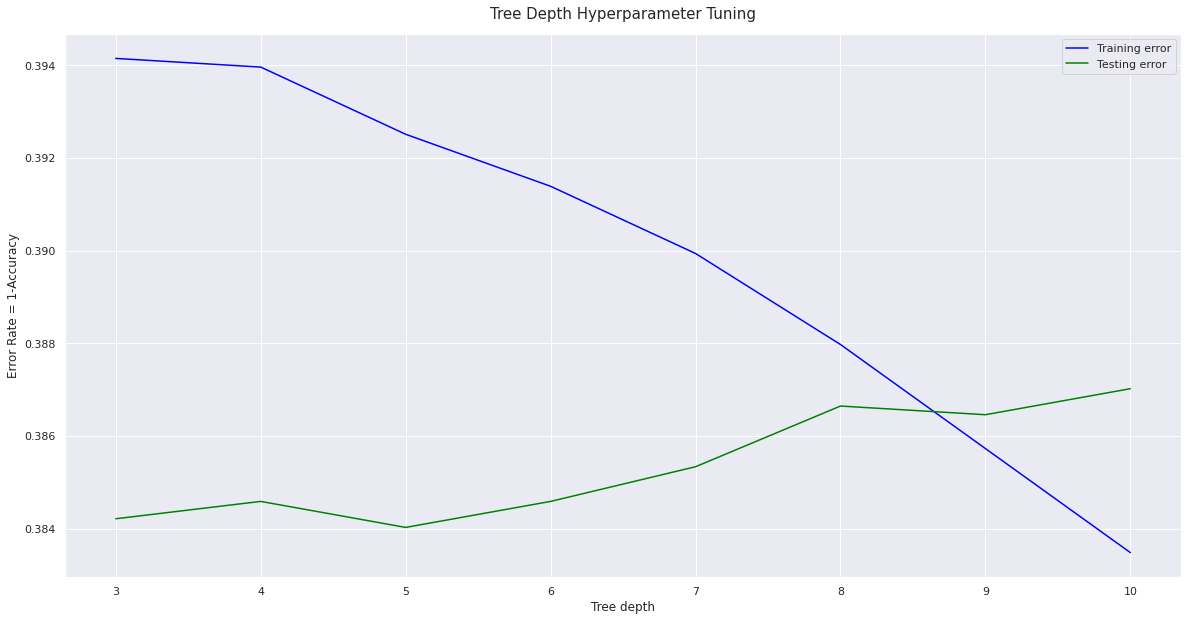

In [129]:
# Make a plot of training and test set error as the decision tree depth is varied.
%matplotlib 
plt.figure(figsize=[20,10])
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
# plt.axvline(x=5, color='orange', linestyle='--')
plt.ylabel('Error Rate = 1-Accuracy')
plt.title('Tree Depth Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.show()

### Tree depth Hyperparameter Tuning
The picture above is a plot of training and test set error as the decision tree depth is varied from 3 to 10. You can clearly see that as our training error rate improves with each increase in depth but our test error rate slowly begins to deteriorate in performance. This is a demonstration of the variance bias tradeoff.

In [206]:
tree = DecisionTreeClassifier(random_state=0)
path = tree.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas_temp, impurities_temp = path.ccp_alphas, path.impurities

In [263]:
# Speed up my code
ccp_alphas = ccp_alphas_temp[-200::8]
impurities = impurities_temp[-200::8]
len(ccp_alphas)

25

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

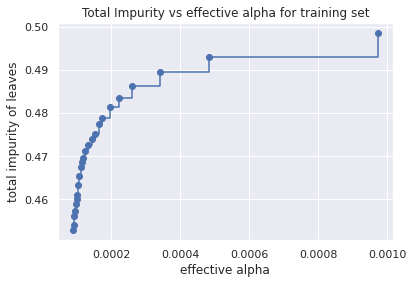

In [264]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [265]:
# Next, we train a decision tree using the effective alphas. 
trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    tree.fit(x_train, y_train)
    trees.append(tree)


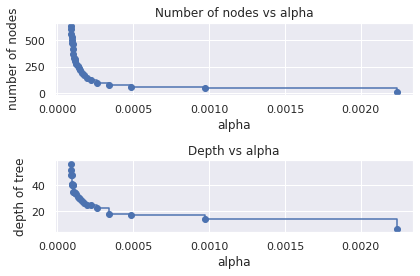

In [266]:
node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.tree_.max_depth for tree in trees]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

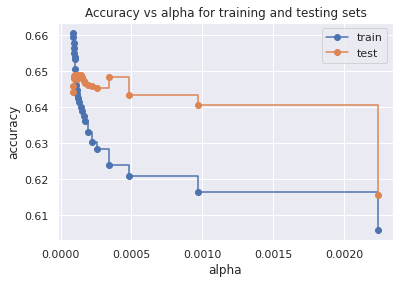

In [267]:
train_scores = [tree.score(x_train, y_train) for tree in trees]
test_scores = [tree.score(x_test, y_test) for tree in trees]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

### Accuracy vs alpha for training and testing sets
When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to close to a 100% (~86%) training accuracy and ~61% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.00012 maximizes the testing accuracy.

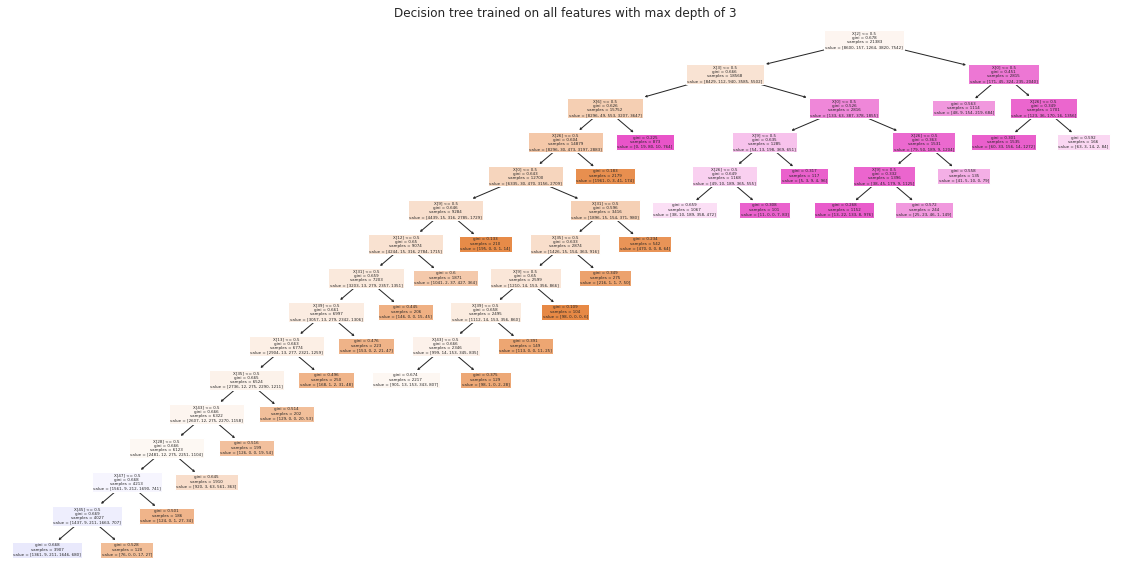

In [176]:
# Plot a pruned decision tree with ccp_apha value of 0.0007
ccp_alpha = 0.0007
treeplot = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha).fit(x_train, y_train)

# Visualize the tree.
from sklearn.tree import plot_tree

plt.figure(figsize=[20,10])
plot_tree(treeplot, filled=True, max_depth=None)
plt.title("Decision tree trained on all features with max depth of 3")
plt.show()

Original Tree
Accuracy Score: 0.616 



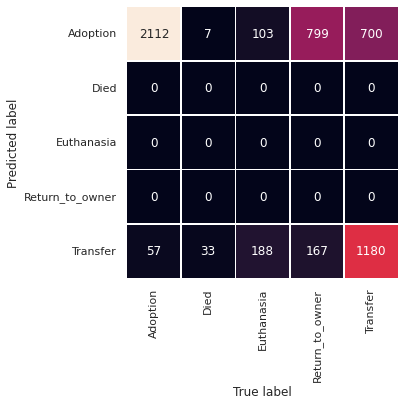

In [185]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=3).fit(x_train, y_train)
y_pred = tree.predict(x_test)

print('Original Tree')
print('Accuracy Score:', round(accuracy_score(y_test, tree.predict(x_test)),3),'\n')

visualize_confusion_matirx(tree, y_test,y_pred)

Pruned Tree
Accuracy Score: 0.642 



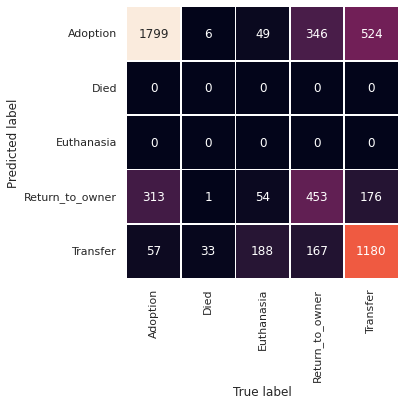

In [184]:
from sklearn.tree import DecisionTreeClassifier
ccp_alpha = 0.0007
tree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha).fit(x_train, y_train)
y_pred = tree.predict(x_test)

print('Pruned Tree')
print('Accuracy Score:', round(accuracy_score(y_test, tree.predict(x_test)),3),'\n')

visualize_confusion_matirx(tree, y_test,y_pred)

### 2.2


In [294]:
# Get data
t_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_2/assignment_2/text_data.csv')

# Resaving as a generic name for reusable code.
df = t_df

t_df.head(3).T

,0,1,2
Unnamed: 0,0,1,2
meta_author,hamilton,jay,jay
meta_title,general introduction for the independent journ...,concerning dangers from foreign force and infl...,the same subject continued concerning dangers ...
000,0,0,0
10,0,0,0
...,...,...,...
yourselves,0,0,0
zaleucus,0,0,0
zeal,3,0,0
zealand,0,0,0


In [295]:
t_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,85.0,42.000000,24.681302,0.0,21.0,42.0,63.0,84.0
000,85.0,0.023529,0.216930,0.0,0.0,0.0,0.0,2.0
10,85.0,0.023529,0.216930,0.0,0.0,0.0,0.0,2.0
11,85.0,0.023529,0.216930,0.0,0.0,0.0,0.0,2.0
13,85.0,0.011765,0.108465,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
yourselves,85.0,0.011765,0.108465,0.0,0.0,0.0,0.0,1.0
zaleucus,85.0,0.011765,0.108465,0.0,0.0,0.0,0.0,1.0
zeal,85.0,0.305882,0.617667,0.0,0.0,0.0,0.0,3.0
zealand,85.0,0.011765,0.108465,0.0,0.0,0.0,0.0,1.0


In [312]:
# Create the decision tree here Randomstate=42 90% training and 10% testing
X = t_df.drop(['meta_author', 'Unnamed: 0','meta_title'], axis=1)
le = preprocessing.LabelEncoder()
labels = t_df['meta_author']
le.fit(labels)
y=le.transform(labels)

# Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [315]:
#Apply the model here
clf = DecisionTreeClassifier(max_depth=3) #Create your model here
clf = clf.fit(X_train, y_train)   #Fit on training data
y_pred = clf.predict(X_test)
print('accuracy %2.2f ' % accuracy_score(y_test,y_pred))

accuracy 0.22 


In [317]:
#Create a loop of max depth from 1 to 16 similar to previous step and draw the 
#above mentioned graph

# Vary the decision tree depth in a loop, increasing depth from 1 to 16 and capture error rate for test and training. 

from sklearn.metrics import accuracy_score

max_depths = range(1, 16 + 1)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth)
    model_1.fit(X_train, y_train)
    training_error.append(1-accuracy_score(y_train, model_1.predict(X_train))) # Save Error Rate = 1-Accuracy
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(1-accuracy_score(y_test, model_2.predict(X_test))) # Save Error Rate = 1-Accuracy


Using matplotlib backend: agg


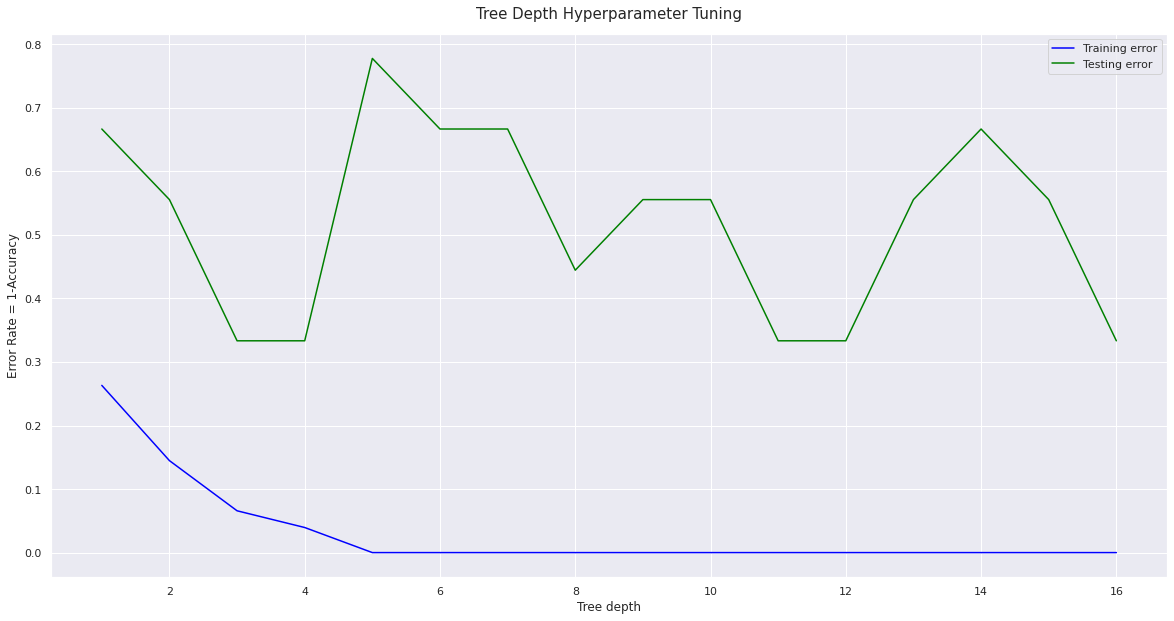

In [318]:
# Make a plot of training and test set error as the decision tree depth is varied.
%matplotlib 
plt.figure(figsize=[20,10])
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
# plt.axvline(x=5, color='orange', linestyle='--')
plt.ylabel('Error Rate = 1-Accuracy')
plt.title('Tree Depth Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.show()

In [327]:
# With a simple code, you can see the frequency of the words
text_frequecies = X.sum()
text_frequecies.sort_values()
display(text_frequecies)

# Save words with frequecy of less than 2
kept_words = text_frequecies[text_frequecies<2]
# this line (above) first creates a binary vector for each word, 
# telling us if it appears twice or more in the dataset. 
# it then uses that vector to index into text_frequencies to subset only the data
# for which this binary vector evaluates to TRUE. 
# This simple indexing can really help to chop through
# a huge pandas dataframe.
print('\n'*2, kept_words)
small_vocab_X = X[kept_words.index]
small_vocab_y = y[kept_words.index]
# notice how kept_words.index is a list of strings, the same you can use to access the headers of X..

000            2
10             2
11             2
13             1
136            1
              ..
yourselves     1
zaleucus       1
zeal          26
zealand        1
zealous        8
Length: 8560, dtype: int64



 13            1
136           1
13th          1
1648          1
1683          1
             ..
yes           1
yokes         1
yourselves    1
zaleucus      1
zealand       1
Length: 2975, dtype: int64


IndexError: ignored

In [328]:
 


# Train split
X_train, X_test, y_train, y_test = train_test_split(small_vocab_X, small_vocab_y, test_size=0.1, random_state=42)

NameError: ignored

In [325]:
# Now repeat the previous analysis (design model by changing the model depth 
#from 1 to 16) with smaller word dataset large_vocab_X
# Plot the above graph again

#Create a loop of max depth from 1 to 16 similar to previous step and draw the 
#above mentioned graph

# Vary the decision tree depth in a loop, increasing depth from 1 to 16 and capture error rate for test and training. 

from sklearn.metrics import accuracy_score

max_depths = range(1, 16 + 1)
training_error = []
for max_depth in max_depths:
    model_1 = DecisionTreeClassifier(max_depth=max_depth)
    model_1.fit(X_train, y_train)
    training_error.append(1-accuracy_score(y_train, model_1.predict(X_train))) # Save Error Rate = 1-Accuracy
    
testing_error = []
for max_depth in max_depths:
    model_2 = DecisionTreeClassifier(max_depth=max_depth)
    model_2.fit(X_train, y_train)
    testing_error.append(1-accuracy_score(y_test, model_2.predict(X_test))) # Save Error Rate = 1-Accuracy


In [ ]:
# Make a plot of training and test set error as the decision tree depth is varied.
%matplotlib 
plt.figure(figsize=[20,10])
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
# plt.axvline(x=5, color='orange', linestyle='--')
plt.ylabel('Error Rate = 1-Accuracy')
plt.title('Tree Depth Hyperparameter Tuning', pad=15, size=15)
plt.legend()
plt.show()

In [ ]:
# Explain your understanding from the graph

### 2.3

In [ ]:
# Get data
a_df = pd.read_csv('https://github.com/zachfreitas/ADS_504_Machine_Learning/raw/main/Module_2/assignment_2/audio_data.csv')
a_df




## Question 3
### 3.1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=42)

### 3.2

### 3.3

### 3.5

